<a href="https://colab.research.google.com/github/serrve1/kdigital/blob/main/%EA%B2%BD%EA%B8%B0%EB%B6%84%EC%84%9D%EC%A0%84_%EC%8A%A4%EC%BC%80%EC%9D%BC%EB%A7%81%EA%B3%BC_%ED%94%BC%EC%B3%90%EC%85%80%EB%A0%89%EC%85%98(k%3D4%EC%9D%BC%EB%95%8C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 한글폰트
# 나눔고딕 폰트 설치
!apt-get -qq -y install fonts-nanum > /dev/null
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# 한글 폰트 설정
font_name = fm.FontProperties(fname=font_path, size=10).get_name()
plt.rc('font', family=font_name)

# 런타임 다시 시작 (이 작업은 Colab에서 한 번만 수행하면 됨)
# Runtime -> Restart runtime 선택하거나 Ctrl+M . 입력 후 선택

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import warnings

# 경고 메시지를 출력하지 않도록 설정
warnings.filterwarnings("ignore")

# 경고 메시지를 발생시키는 함수
def example_function():
    warnings.warn("이 함수는 예제일 뿐입니다.", UserWarning)

# 함수 호출
example_function()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


데이터 스케일링
데이터 스케일링(Data Scaling)이란 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업을 의미합니다. 값을 조정하는 과정이기 때문에 수치형 변수에만 적용해야 합니다.

사이킷런에서는 스케일링을 수행하기 위한 다양한 스케일러를 제공하는데요.
이때 모든 스케일러는 공통적으로 다음과 같은 메서드를 이용합니다.

fit(): 데이터 변환을 위한 기존 정보 설정 (ex: 데이터 세트의 최댓값/최솟값)
transform(): fit()을 통해 설정된 정보를 이용해 실제로 데이터를 변환
그리고 fit_transform()은 위 두 가지 메서드를 한 번에 적용하는 기능을 수행합니다.


우선, 스케일링의 대표적인 방법인 표준화(Standardization)와 정규화(Normalization)를 살펴보겠습니다.

In [4]:
# 기본패키지 설치
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans # 케이민즈 알고리즘
from sklearn.preprocessing import StandardScaler# 스텐다드 스케일러
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc

In [5]:
# 데이터프레임 불러오기
economics = pd.read_csv('/content/drive/MyDrive/프로젝트1/dataset/resampled_data_final.csv',encoding="euc-kr")
economics['DATE'] = pd.to_datetime(economics['DATE'])
economics['DATE'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 289 entries, 0 to 288
Series name: DATE
Non-Null Count  Dtype         
--------------  -----         
287 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.4 KB


In [6]:
economics[economics.isna().any(axis=1)] # 결측치 확인

,DATE,장단기10년물국채/3개월금리차,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,금융상태지수레버리지,소비자감성지수,기준금리,제조업신규주문,M2통화량,신규실업수당청구,경기동행종합,산업생산지수,소매판매
287,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
economics = economics.iloc[:287 , ] # 결측치 제거
economics[economics.isna().any(axis=1)] # 결측치 확인

,DATE,장단기10년물국채/3개월금리차,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,금융상태지수레버리지,소비자감성지수,기준금리,제조업신규주문,M2통화량,신규실업수당청구,경기동행종합,산업생산지수,소매판매


In [8]:
# 2000년~2019년만 군집화하기 위함 , 코로나 데이터가 이상치로 잡히기 때문에 군집이 제대로 형성되지 않음
economics = economics.loc[economics['DATE'].dt.year <=2019 ]

In [9]:
# 주택가격지수. 제조업신규주문 , 경기동행종합지수는 차분하고 (변동치로 변경한다는 뜻)
# 제조업 신규주문은 앞으로 어떻게 처리할지 일단 보류
#M2와 소매판매는 변화율로 바꾸는 전처리 시행
economics.주택가격지수 = economics.주택가격지수.diff().fillna(method= 'bfill')
economics.경기동행종합 = economics.경기동행종합.diff().fillna(method= 'bfill')
economics['M2차분'] = economics.M2통화량.diff().fillna(method= 'bfill')
economics['M2변화율'] = economics.M2차분/ (economics.M2통화량.shift(1)) * 100
#economics['M2변화율'] .fillna(method = 'ffill')
economics['소매판매차분'] = economics.소매판매.diff().fillna(method='bfill')
economics['소매판매변화율'] = economics.소매판매차분/ (economics.소매판매.shift(1)) * 100


# 차분, 변화율 확인
economics[['M2통화량','M2차분','M2변화율','소매판매','소매판매차분','소매판매변화율']].head(10)
# 결측치를 다음날 데이터로 채워주기
economics['M2변화율'] = economics['M2변화율'].fillna(method = 'bfill')
economics['소매판매변화율'] = economics['소매판매변화율'].fillna(method = 'bfill')
# M2, 소매판매 원데이터를 지웠습니다.
economics.drop(['M2통화량','M2차분','소매판매','소매판매차분'],axis = 1,inplace = True)

In [10]:
# 다시 날짜를 인덱스로 설정해주기
economics = economics.set_index('DATE')

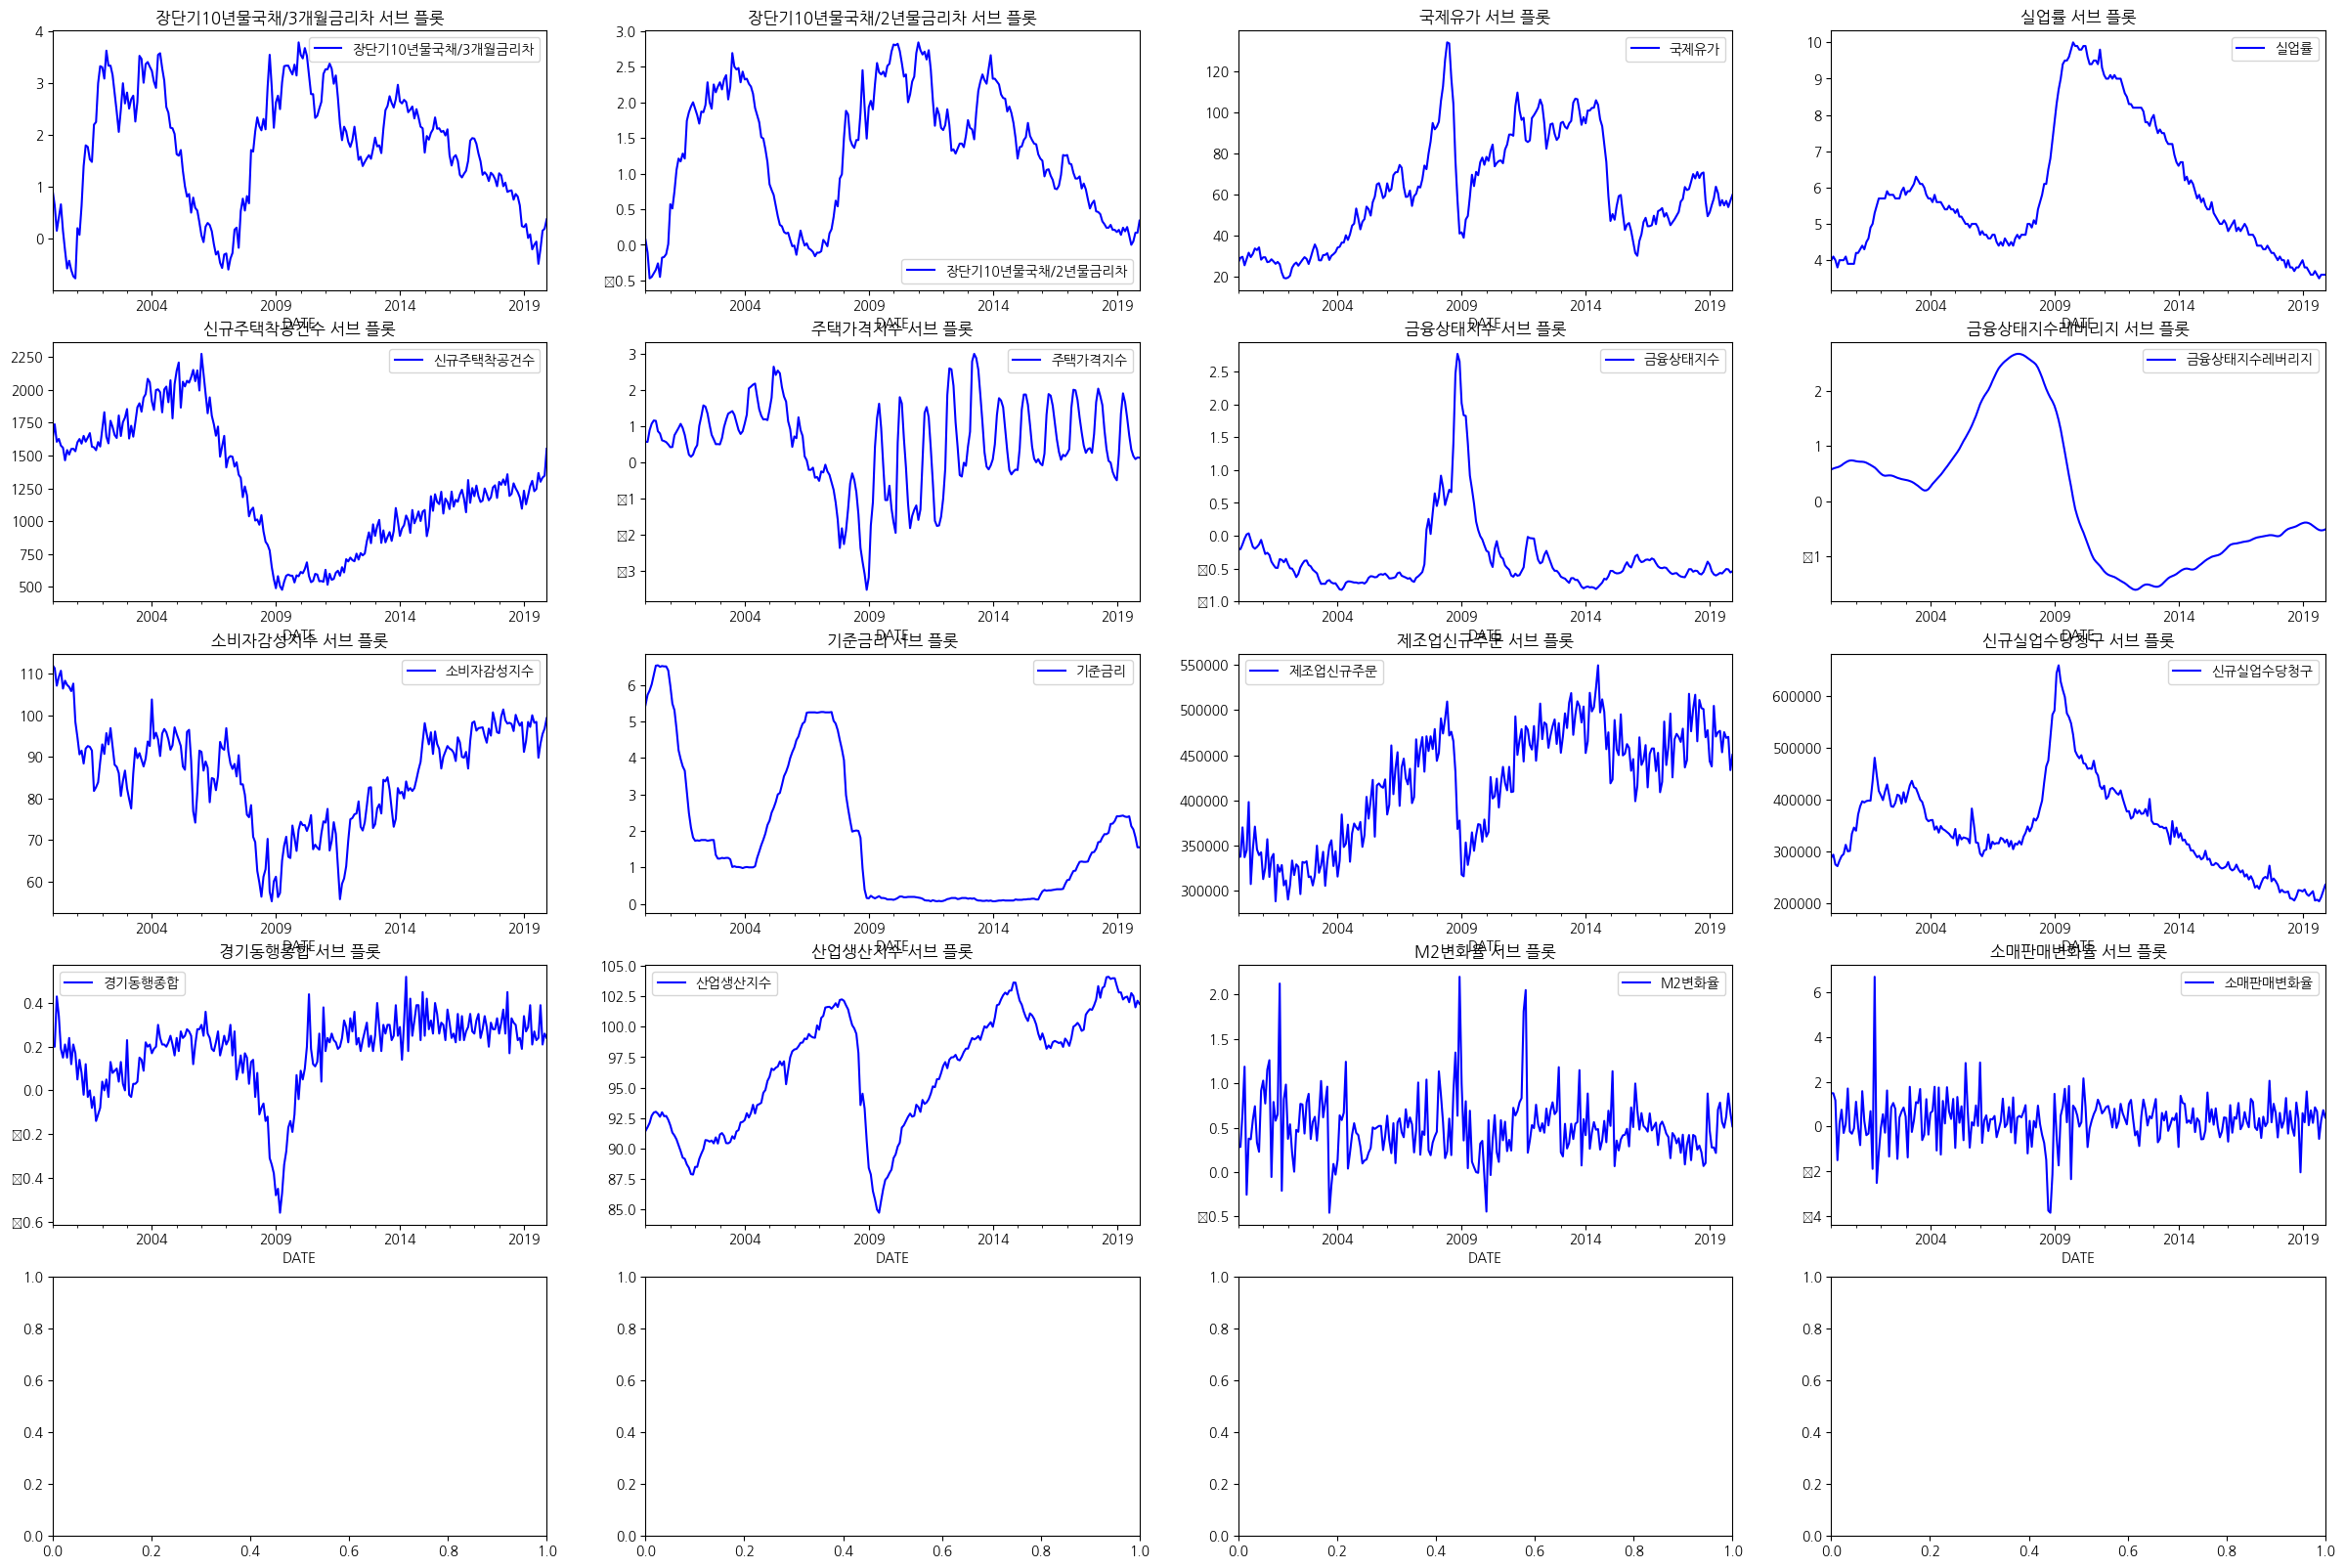

In [11]:
# 원데이터를 간단하게 시각화 해서 보기
plt.rc('font', family='NanumGothic')
가로, 세로 = 30, 20  # 원하는 크기로 조절
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(가로, 세로))  # 3행 4열의 서브 플롯 생성
# 각 컬럼에 대한 서브 플롯 그리기
for i, col in enumerate(economics.columns):
    economics.plot(y= col, kind='line', ax=axs[i//4, i%4], color='blue')
    axs[i//4, i%4].set_title(f'{col} 서브 플롯')

# 그래프 출력
plt.show()

표준화(Standardization)는 변수 각각의 평균을 0, 분산을 1로 만들어주는 스케일링 기법입니다. 표준화가 적용된 변수는 가우시안 정규분포를 가진 값으로 변환됩니다.

아래 수식과 같이, 변수 x의 원래 값에서 x의 평균을 뺀 값을 x의 표준편차로 나눈 값으로 계산할 수 있습니다.



#### 스케일링

1. min-max : 0~1까지인데 이건 시간적으로 상승하는데이터는
좋지 않아보임

2. StandardScaler

In [12]:
# # scikit-learn 패키지의 StandardScaler 클래스를 불러옵니다.
# from sklearn.preprocessing import StandardScaler
# # StandardScaler 객체를 생성합니다.
# standard_scaler = StandardScaler()
# # fit_transform()을 사용해서 학습과 스케일링을 한 번에 적용합니다.
# scaled_eocs = standard_scaler.fit_transform(economics)
# # 표준화가 완료된 데이터를 데이터프레임 형태로 변환합니다.
# scaled_eocs = pd.DataFrame(scaled_eocs,
#                               index=economics.index,
#                               columns=economics.columns)
# # 표준화가 잘 되었는지 데이터를 확인해봅시다.
# scaled_eocs.head()

In [13]:
# 민멕스 스케일링
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 선언 및 Fitting
mMscaler = MinMaxScaler()
mMscaler.fit(economics)

# 데이터 변환
mMscaled_data = mMscaler.transform(economics)

# 데이터 프레임으로 저장
mMscaled_data = pd.DataFrame(data = mMscaled_data, index = economics.index , columns = economics.columns)

In [14]:
mMscaled_data

,장단기10년물국채/3개월금리차,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,금융상태지수레버리지,소비자감성지수,기준금리,제조업신규주문,신규실업수당청구,경기동행종합,산업생산지수,M2변화율,소매판매변화율
DATE,,,,,,,,,,,,,,,,
2000-01-31,0.370614,0.163142,0.068739,0.076923,0.645125,0.627085,0.175077,0.510175,1.000000,0.831530,0.188923,0.185840,0.703704,0.346574,0.279060,0.506405
2000-02-29,0.309211,0.108761,0.087142,0.092308,0.701393,0.627085,0.172010,0.513918,0.987654,0.874807,0.188923,0.197585,0.703704,0.362563,0.279060,0.506405
2000-03-31,0.201754,0.000000,0.091300,0.076923,0.627298,0.676664,0.192640,0.516959,0.913580,0.893354,0.313151,0.155873,0.916667,0.380972,0.420244,0.476300
2000-04-30,0.258772,0.006042,0.055314,0.046154,0.639554,0.704055,0.216616,0.519298,0.950617,0.919629,0.186618,0.148957,0.833333,0.411371,0.619081,0.222681
2000-05-31,0.313596,0.021148,0.082094,0.076923,0.611142,0.717521,0.234737,0.522573,0.977072,0.958269,0.216105,0.172338,0.694444,0.424436,0.076356,0.377830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,0.061404,0.141994,0.309343,0.015385,0.495265,0.594644,0.078896,0.258480,0.608466,0.318393,0.716657,0.006696,0.740741,0.930879,0.360217,0.429159
2019-09-30,0.125000,0.157100,0.328043,0.000000,0.457939,0.566947,0.088096,0.253567,0.668430,0.304482,0.692453,0.000000,0.879630,0.918323,0.408469,0.313010
2019-10-31,0.201754,0.193353,0.301980,0.015385,0.475766,0.553940,0.086702,0.251696,0.708995,0.272025,0.696627,0.017563,0.712963,0.870483,0.505253,0.391452


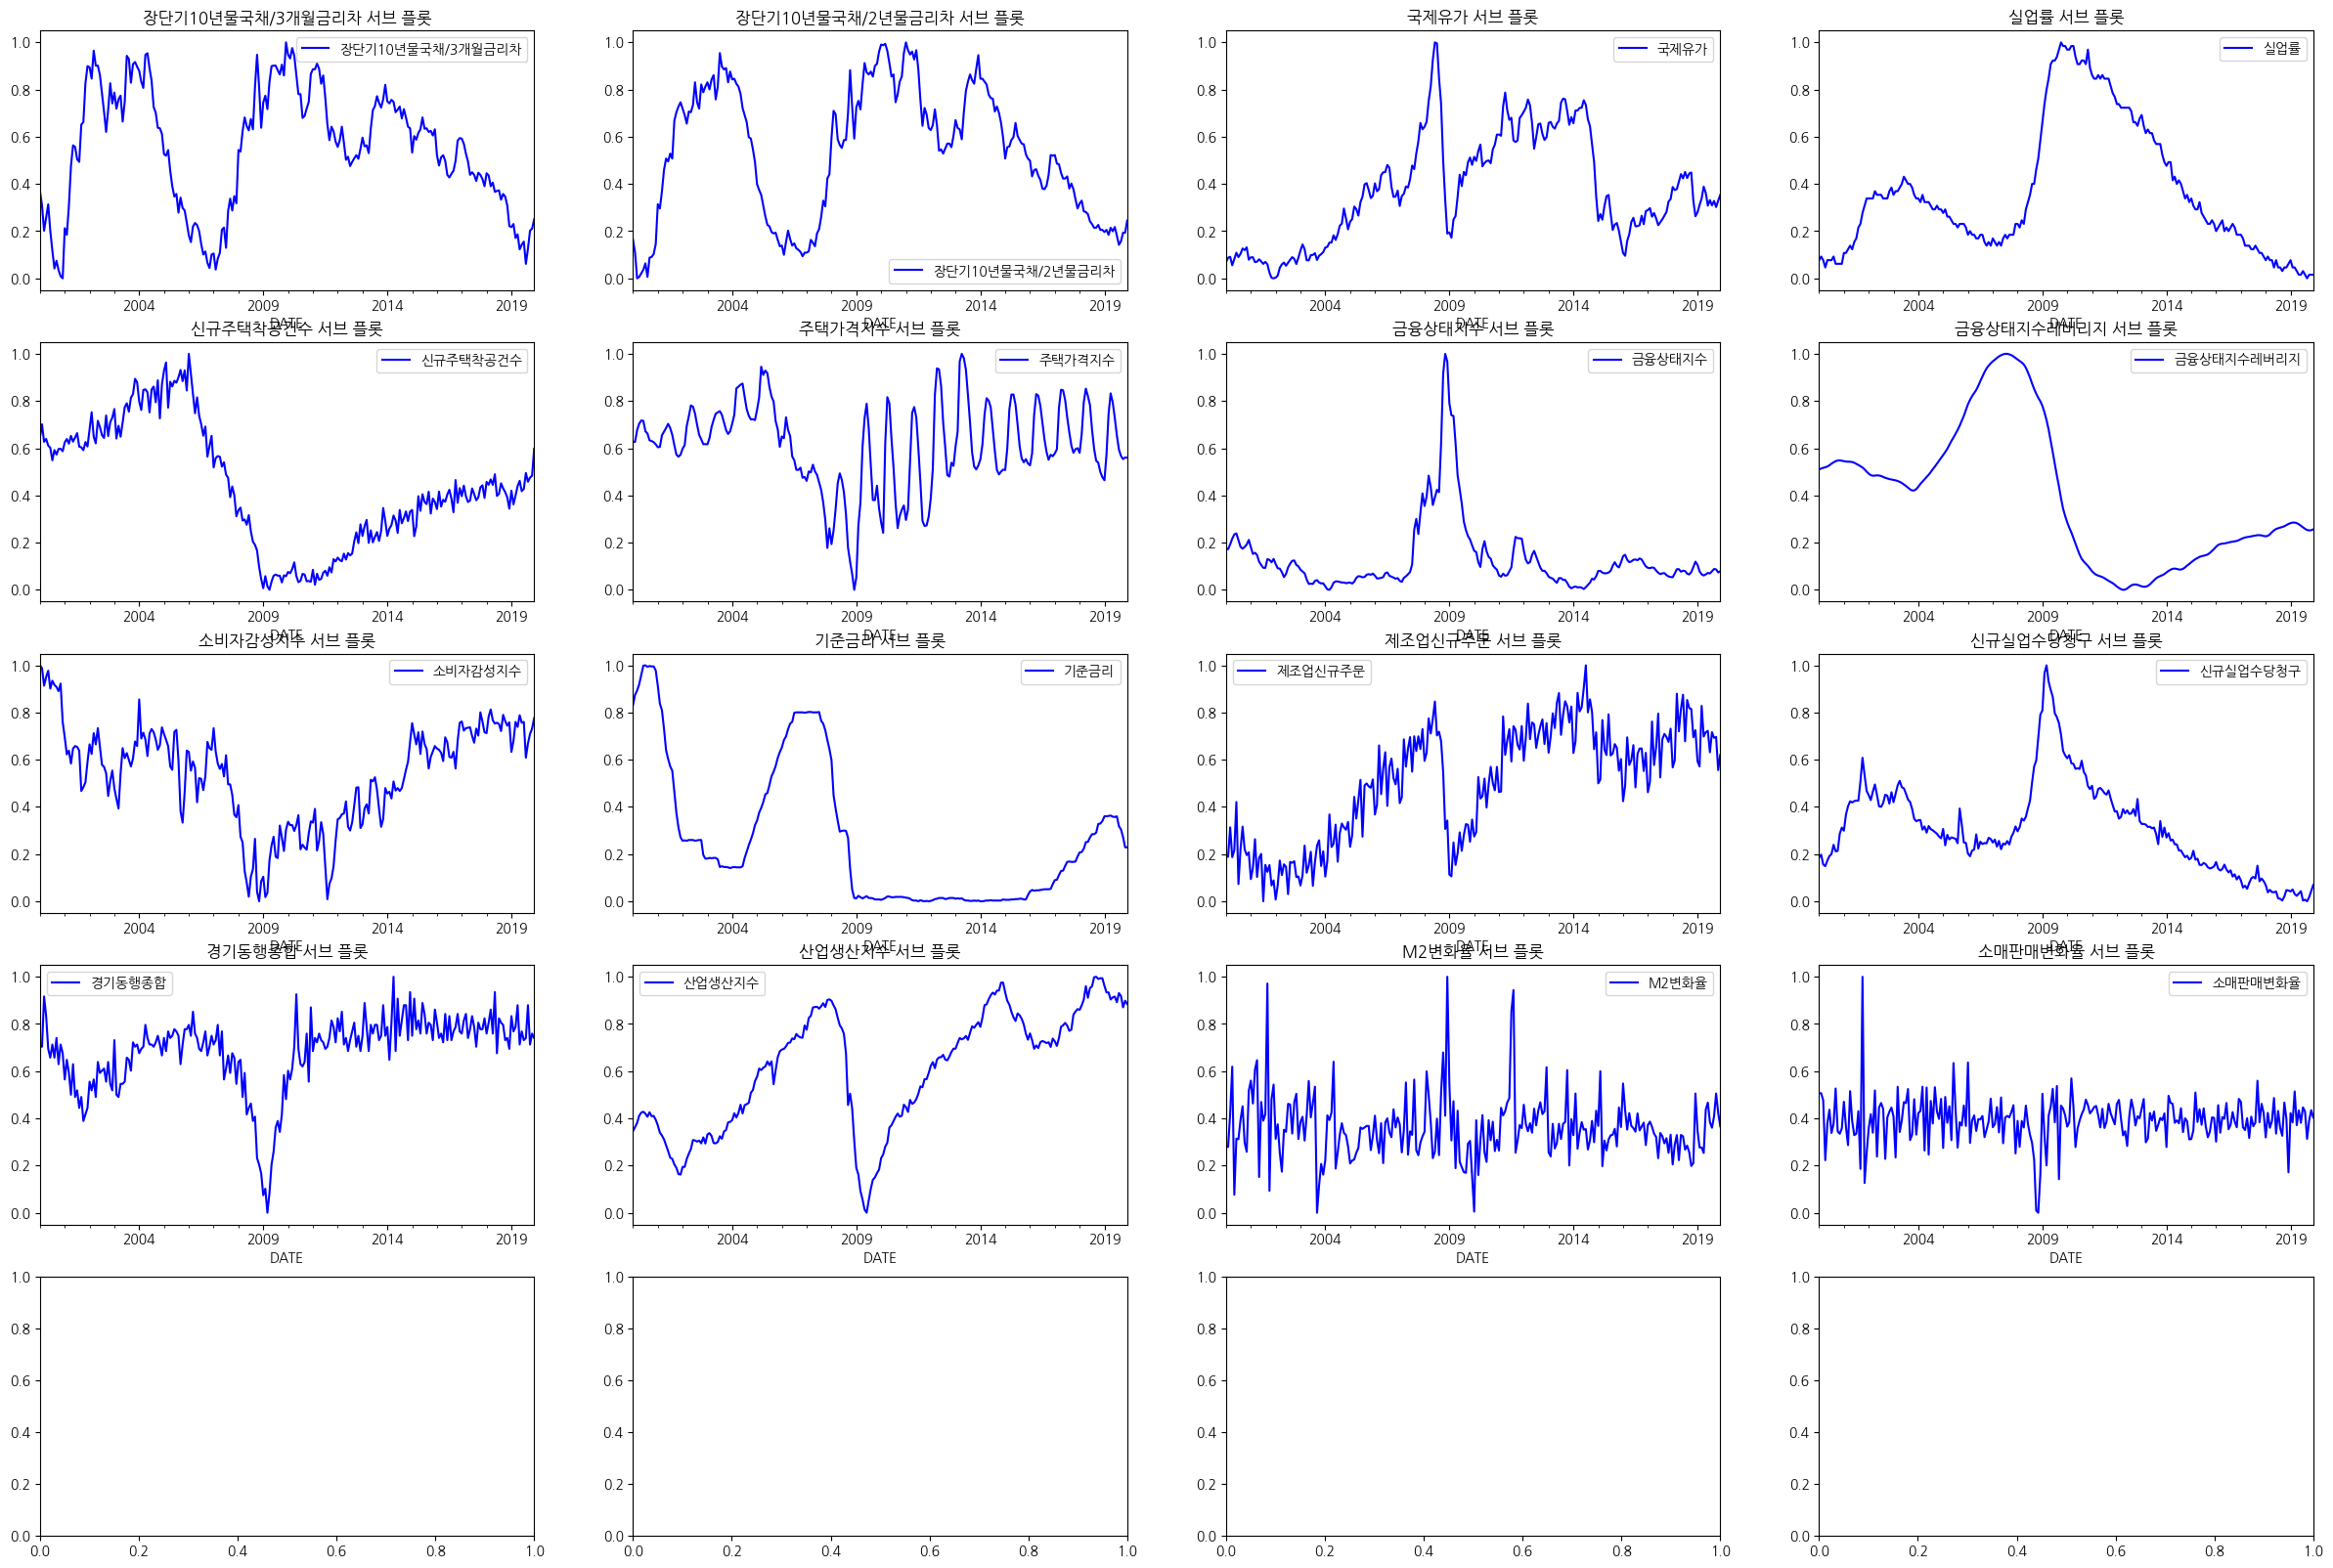

In [15]:
# 민멕스 스케일링한 데이터를 간단하게 시각화 해서 보기
가로, 세로 = 30, 20  # 원하는 크기로 조절
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(가로, 세로))  # 3행 4열의 서브 플롯 생성
# 각 컬럼에 대한 서브 플롯 그리기
for i, col in enumerate(mMscaled_data.columns):
    mMscaled_data.plot(y= col, kind='line', ax=axs[i//4, i%4], color='blue')
    axs[i//4, i%4].set_title(f'{col} 서브 플롯')

# 그래프 출력
plt.show()

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

import plotly.express as px


In [17]:
# from sklearn.cluster import KMeans
# sum_of_squared_distances = []
# K = range(1, 15)
# for k in K:
#     km = KMeans(n_clusters = k)
#     km = km.fit(mMscaled_data) # 데이터프레임 입력
#     sum_of_squared_distances.append(km.inertia_)

# # 시각화

# plt.plot(K, sum_of_squared_distances, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Sum_of_squared_distances')
# plt.title('Elbow Method For Optimal k')
# plt.axvline(2,c= 'r',alpha =0.4)
# plt.axvline(3,c= 'r',alpha =0.4)
# plt.show()

In [18]:
# from sklearn.metrics import silhouette_score
# k_range = range(2,14)

# best_n = -1
# best_silhouette_score = -1

# for k in k_range:

#   kmeans = KMeans(n_clusters=k, random_state=200)
#   kmeans.fit(mMscaled_data)#데이터프레임
#   clusters = kmeans.predict(mMscaled_data)#데이터프레임입력

#   score = silhouette_score(mMscaled_data, clusters)
#   print('k :',  k, 'score :', score)

#   if score > best_silhouette_score:
#     best_n = k
#     best_silhouette_score = score

# print('best n :', best_n, 'best score :', best_silhouette_score )

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd
import numpy as np

# KMeans
kmeans = KMeans(n_clusters=4, init="k-means++", max_iter=300, random_state=200)
kmeans.fit(mMscaled_data)

# 데이터 프레임에 cluster 추가
mMscaled_data["cluster"] = kmeans.labels_

# 개별 데이터 실루엣 계수
score_samples = silhouette_samples(mMscaled_data, mMscaled_data.cluster)
print(f'silhouette_samples( ) return 값의 shape: {score_samples.shape}')

# 데이터 프레임에 실루엣 계수 추가
mMscaled_data['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수
average_score = silhouette_score(mMscaled_data, mMscaled_data.cluster)
print(f'경제데이터 Silhouette Analysis Score: {average_score:.3f}')


silhouette_samples( ) return 값의 shape: (240,)
경제데이터 Silhouette Analysis Score: 0.564


In [20]:
mMscaled_data.groupby("cluster").mean()[["silhouette_coeff"]]

,silhouette_coeff
cluster,
0,0.63
1,0.66
2,0.41
3,0.62


In [21]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features):

    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

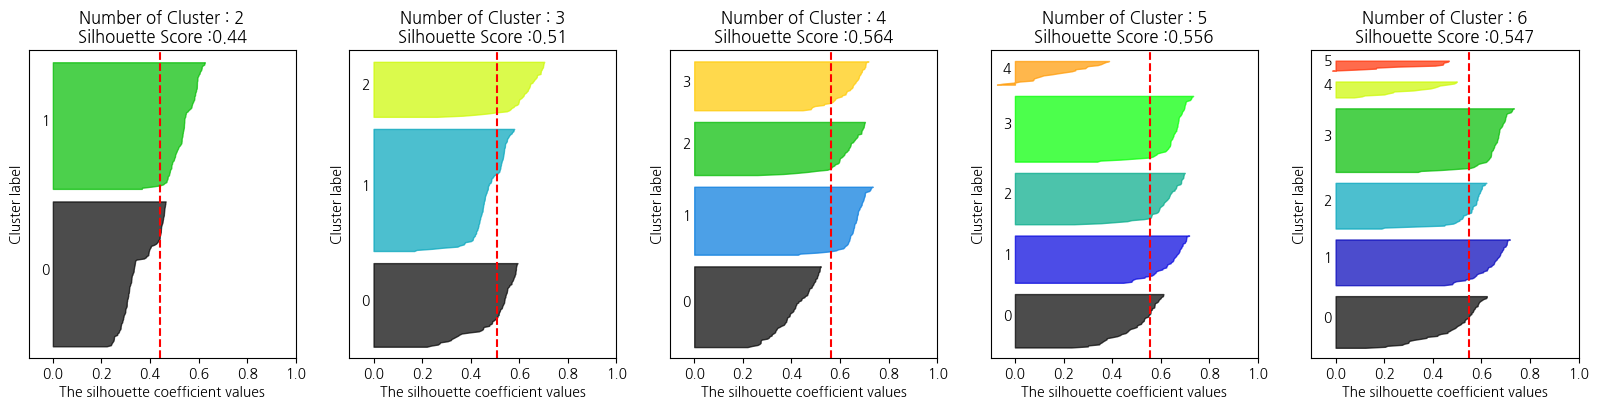

In [22]:
# 군집 개수 최적화
visualize_silhouette([ 2, 3, 4, 5 , 6], mMscaled_data)

In [23]:
# 0번 군집의 시기를 확인해봅니다.
mMscaled_data[mMscaled_data['cluster']== 3]

,장단기10년물국채/3개월금리차,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,금융상태지수레버리지,소비자감성지수,기준금리,제조업신규주문,신규실업수당청구,경기동행종합,산업생산지수,M2변화율,소매판매변화율,cluster,silhouette_coeff
DATE,,,,,,,,,,,,,,,,,,
2000-01-31,0.37,0.16,0.07,0.08,0.65,0.63,0.18,0.51,1.00,0.83,0.19,0.19,0.70,0.35,0.28,0.51,3,0.60
2000-02-29,0.31,0.11,0.09,0.09,0.70,0.63,0.17,0.51,0.99,0.87,0.19,0.20,0.70,0.36,0.28,0.51,3,0.62
2000-03-31,0.20,0.00,0.09,0.08,0.63,0.68,0.19,0.52,0.91,0.89,0.31,0.16,0.92,0.38,0.42,0.48,3,0.63
2000-04-30,0.26,0.01,0.06,0.05,0.64,0.70,0.22,0.52,0.95,0.92,0.19,0.15,0.83,0.41,0.62,0.22,3,0.60
2000-05-31,0.31,0.02,0.08,0.08,0.61,0.72,0.23,0.52,0.98,0.96,0.22,0.17,0.69,0.42,0.08,0.38,3,0.60
2000-06-30,0.20,0.04,0.11,0.08,0.60,0.72,0.24,0.53,0.90,1.00,0.42,0.19,0.66,0.43,0.31,0.44,3,0.64
2000-07-31,0.12,0.06,0.09,0.08,0.55,0.67,0.21,0.53,0.93,1.00,0.07,0.20,0.71,0.42,0.31,0.34,3,0.62
2000-08-31,0.04,0.01,0.10,0.09,0.59,0.66,0.18,0.54,0.92,0.99,0.22,0.24,0.66,0.41,0.39,0.38,3,0.64
2000-09-30,0.07,0.09,0.13,0.06,0.57,0.63,0.17,0.55,0.91,1.00,0.32,0.21,0.74,0.43,0.45,0.53,3,0.64


In [24]:
# 각 군집마다 해당되는 월의 개수를 표시해줍니다.
data_list = list(mMscaled_data['cluster'].value_counts())
for i, j  in enumerate(data_list) :
    print(f'{i}번째 클러스터 개수는 {j}개 입니다')

0번째 클러스터 개수는 77개 입니다
1번째 클러스터 개수는 65개 입니다
2번째 클러스터 개수는 51개 입니다
3번째 클러스터 개수는 47개 입니다


In [25]:
from sklearn.cluster import MeanShift
from sklearn.model_selection import train_test_split

# X, y = train_test_split(mMscaled_data, test_size=0.3, random_state=0)


# Mean Shift
meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(mMscaled_data)

print(f"Mean Shift Cluster 유형: {np.unique(cluster_labels)}")

Mean Shift Cluster 유형: [0 1 2 3 4]


In [26]:
# 알고리즘 방법으로 대역폭 설정하는 방식 = 절대적인게 아니라서 적정히 활용

# # 대역폭에 따라 군집의 개수는 큰 영향을 받으므로 최적의 대역폭을 찾는 것이 중요하다.
# from sklearn.cluster import estimate_bandwidth

# bandwidth = estimate_bandwidth(mMscaled_data)
# print('bandwidth 값:', round(bandwidth,3))

In [27]:
cluster_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [28]:
mMscaled_data['MeanShift_cluster'] = cluster_labels
mMscaled_data

,장단기10년물국채/3개월금리차,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,금융상태지수레버리지,소비자감성지수,기준금리,제조업신규주문,신규실업수당청구,경기동행종합,산업생산지수,M2변화율,소매판매변화율,cluster,silhouette_coeff,MeanShift_cluster
DATE,,,,,,,,,,,,,,,,,,,
2000-01-31,0.37,0.16,0.07,0.08,0.65,0.63,0.18,0.51,1.00,0.83,0.19,0.19,0.70,0.35,0.28,0.51,3,0.60,2
2000-02-29,0.31,0.11,0.09,0.09,0.70,0.63,0.17,0.51,0.99,0.87,0.19,0.20,0.70,0.36,0.28,0.51,3,0.62,2
2000-03-31,0.20,0.00,0.09,0.08,0.63,0.68,0.19,0.52,0.91,0.89,0.31,0.16,0.92,0.38,0.42,0.48,3,0.63,2
2000-04-30,0.26,0.01,0.06,0.05,0.64,0.70,0.22,0.52,0.95,0.92,0.19,0.15,0.83,0.41,0.62,0.22,3,0.60,2
2000-05-31,0.31,0.02,0.08,0.08,0.61,0.72,0.23,0.52,0.98,0.96,0.22,0.17,0.69,0.42,0.08,0.38,3,0.60,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,0.06,0.14,0.31,0.02,0.50,0.59,0.08,0.26,0.61,0.32,0.72,0.01,0.74,0.93,0.36,0.43,1,0.63,0
2019-09-30,0.12,0.16,0.33,0.00,0.46,0.57,0.09,0.25,0.67,0.30,0.69,0.00,0.88,0.92,0.41,0.31,1,0.65,0
2019-10-31,0.20,0.19,0.30,0.02,0.48,0.55,0.09,0.25,0.71,0.27,0.70,0.02,0.71,0.87,0.51,0.39,1,0.66,0


In [29]:
mMscaled_data['MeanShift_cluster'].value_counts().index

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [30]:
mMscaled_data['MeanShift_cluster'].value_counts()

0    65
1    63
2    50
3    47
4    15
Name: MeanShift_cluster, dtype: int64

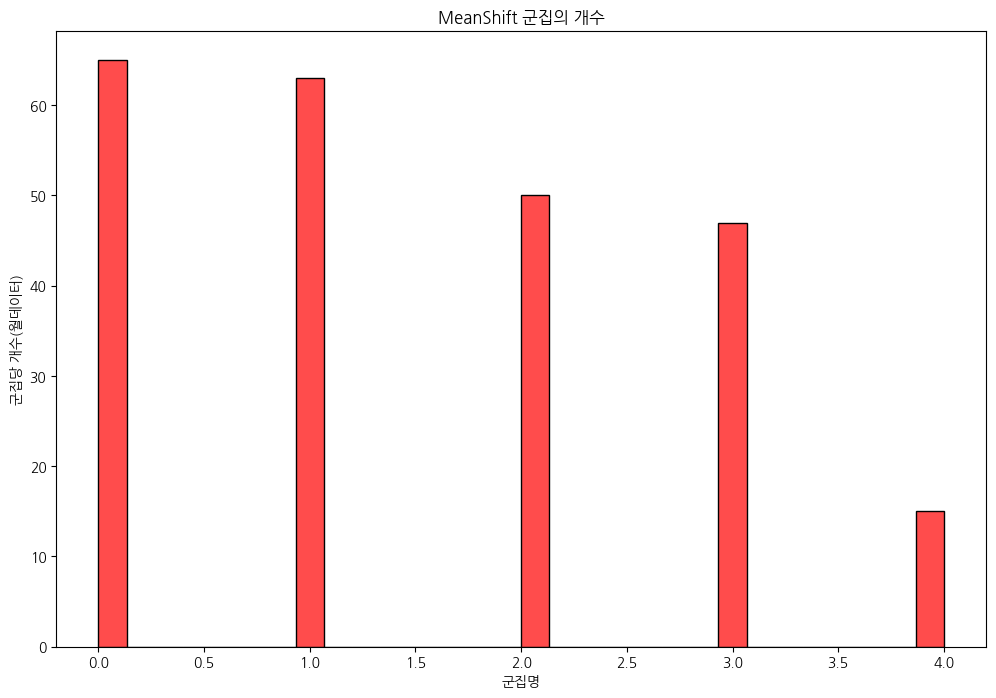

In [31]:
# menashift 군집화 결과를 시각화
import seaborn as sns
# Seaborn 히스토그램 그리기

a=  mMscaled_data['MeanShift_cluster']
plt.figure(figsize=(12, 8))
# 무지개 색깔
sns.histplot(a, bins=30, color = 'red', edgecolor='black', alpha=0.7)
# 그래프 제목과 축 레이블 추가
plt.title('MeanShift 군집의 개수')
plt.xlabel('군집명')
plt.ylabel('군집당 개수(월데이터)')

# 그래프 보이기
plt.show()

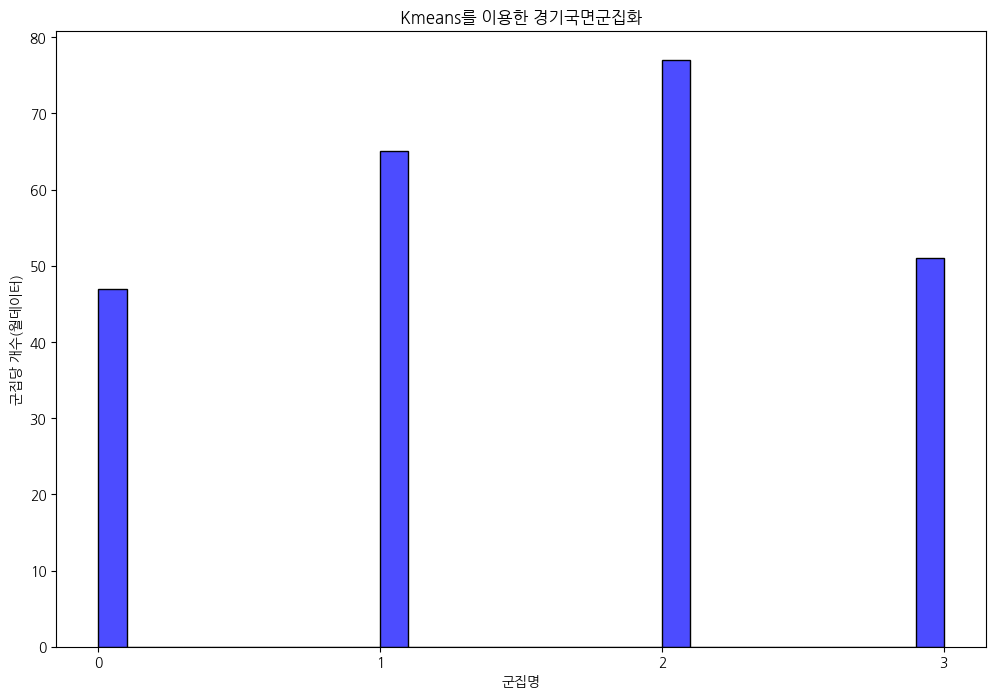

In [32]:
# k-means 군집화의 클러스터를 시각화
import matplotlib.ticker as ticker
# Seaborn 히스토그램 그리기
b=  mMscaled_data['cluster'].astype(int)


# Seaborn 히스토그램 그리기
plt.figure(figsize=(12, 8))
ax = sns.histplot(b, bins=30, kde=False, color='blue', alpha=0.7)

# x축 눈금을 정수로 바꾸는 함수
def format_func(value, tick_number):
    return int(value)

# x축 눈금에 함수 적용
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_func))

# 그래프 제목과 축 레이블 추가
plt.title('Kmeans를 이용한 경기국면군집화')
plt.xlabel('군집명')
plt.ylabel('군집당 개수(월데이터)')

# 그래프 보이기
plt.show()
